a = 3.003024401611996, a_SE = 0.25587155911287873
b = 2.640546812328815, b_SE = 0.21950325218984204
c = 1.5746473500027591, c_SE = 0.20728980984175613
d = 2.479514276870712, d_SE = 0.30628103745051066


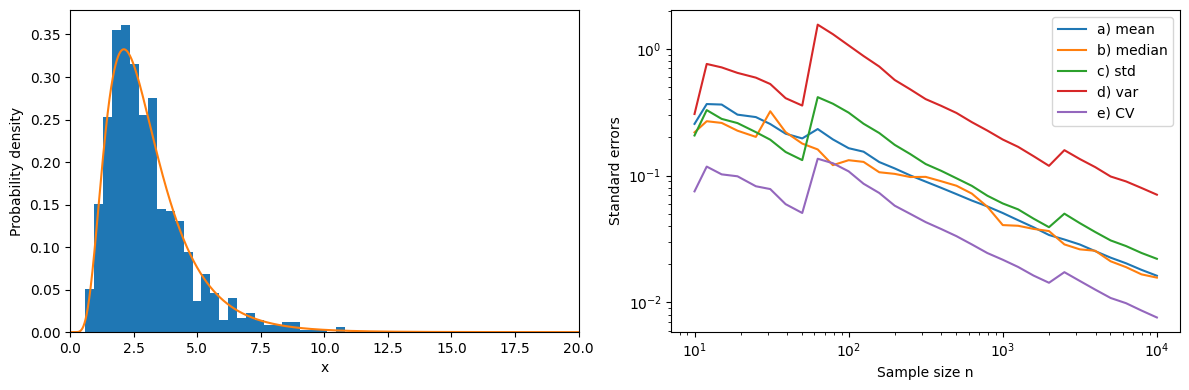

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Set random seed for reproducibility
np.random.seed(0)

# Parameters for the lognormal distribution
mu = 1
sigma = 0.5
n = 1000

# Draw n samples from a lognormal distribution with specified parameters
x = np.random.lognormal(mean=mu, sigma=sigma, size=n)

# Calculate basic statistics
a = np.mean(x)  # Mean of the sample
b = np.median(x)  # Median of the sample
c = np.std(x)  # Standard deviation of the sample
d = np.var(x)  # Variance of the sample

# Plotting histogram of the drawn samples and lognormal pdf
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.hist(x, bins='auto', density=True)
ax1.plot(np.arange(0, 20, 0.01), lognorm.pdf(np.arange(0, 20, 0.01), s=sigma, scale=np.exp(mu)))
ax1.set_xlabel('x')
ax1.set_ylabel('Probability density')
ax1.set_xlim([0, 20])

# Increase the sample size and calculate standard errors (SE) of various statistics using bootstrapping
x = np.random.lognormal(mean=mu, sigma=sigma, size=int(1e4))
n = np.floor(10 ** np.arange(1, 4.1, 0.1)).astype(int)  # Array of sample sizes
a_SE = np.zeros_like(n, dtype=float)
b_SE = np.zeros_like(n, dtype=float)
c_SE = np.zeros_like(n, dtype=float)
d_SE = np.zeros_like(n, dtype=float)
e_SE = np.zeros_like(n, dtype=float)

B = 10**4  # Number of bootstrap samples

# For each sample size, calculate SE for the mean, median, std, var, and CV
for i in range(len(n)):
    a_SE[i] = np.std(np.random.choice(x[:n[i]], size=(B, n[i])).mean(axis=1))
    b_SE[i] = np.std(np.median(np.random.choice(x[:n[i]], size=(B, n[i])), axis=1))
    c_SE[i] = np.std(np.random.choice(x[:n[i]], size=(B, n[i])).std(axis=1))
    d_SE[i] = np.std(np.random.choice(x[:n[i]], size=(B, n[i])).var(axis=1))
    e_SE[i] = np.std(np.random.choice(x[:n[i]], size=(B, n[i])).std(axis=1) / np.random.choice(x[:n[i]], size=(B, n[i])).mean(axis=1))

# Print the statistics and their standard errors
print(f"a = {a}, a_SE = {a_SE[0]}")
print(f"b = {b}, b_SE = {b_SE[0]}")
print(f"c = {c}, c_SE = {c_SE[0]}")
print(f"d = {d}, d_SE = {d_SE[0]}")

# Log-log plot of the standard errors vs. sample size
SE_data = [a_SE, b_SE, c_SE, d_SE, e_SE]
labels = ['a) mean', 'b) median', 'c) std', 'd) var', 'e) CV']

for data, label in zip(SE_data, labels):
    if np.all(data > 0):
        ax2.plot(n, data, label=label)

ax2.set_xlabel('Sample size n')
ax2.set_ylabel('Standard errors')
if np.all(n > 0):
    ax2.set_xscale('log')
if np.all([np.all(data > 0) for data in SE_data]):
    ax2.set_yscale('log')
ax2.legend(loc='best')

plt.tight_layout()
plt.show()
